In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

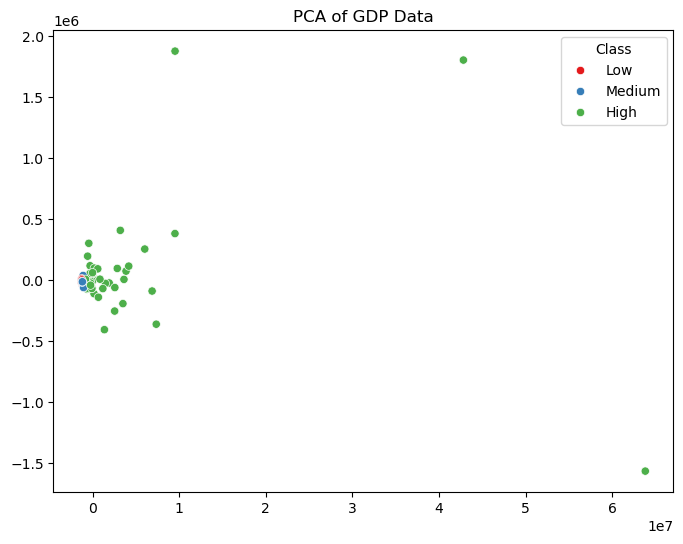

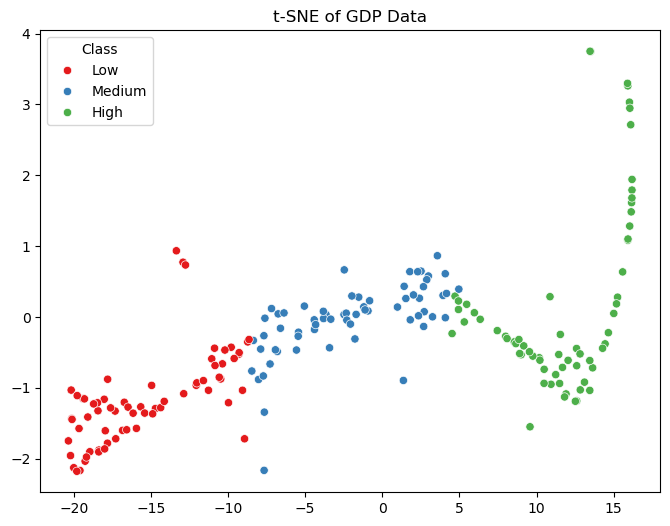

In [28]:
years = ['2020','2021','2022','2023','2024','2025']
X = df[years].fillna(0)

gdp_2023 = df['2023'].fillna(0)
df['Class'] = pd.qcut(gdp_2023, q=3, labels=["Low", "Medium", "High"])  # по терцилях

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Class'], palette="Set1")
plt.title("PCA of GDP Data")
plt.show()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df['Class'], palette="Set1")
plt.title("t-SNE of GDP Data")
plt.show()

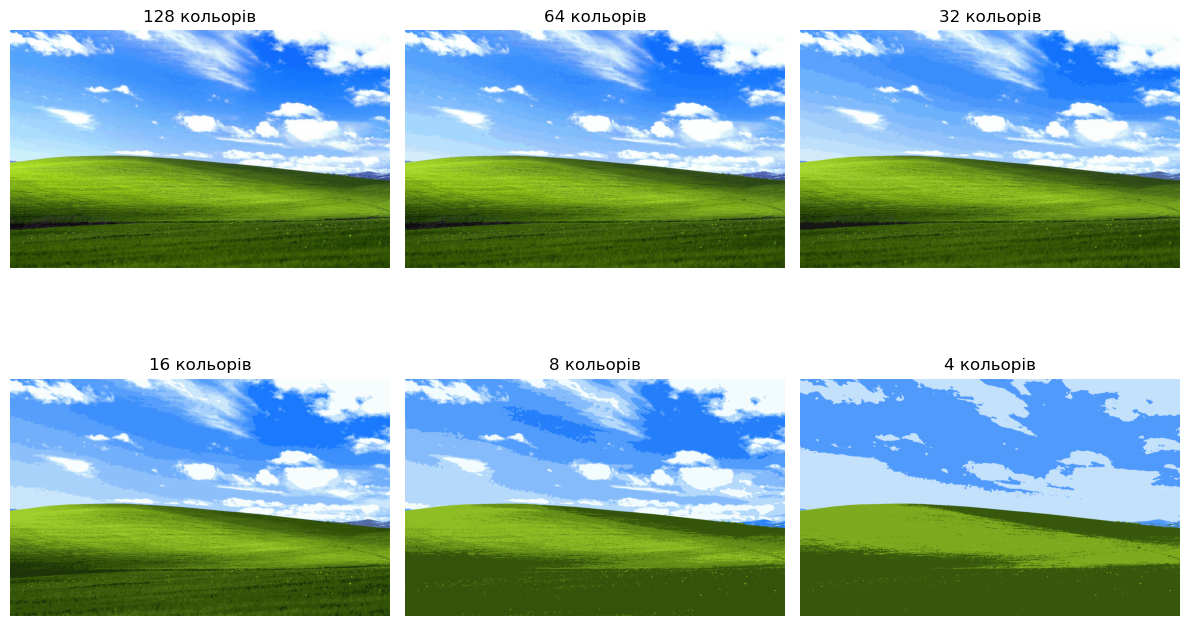

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image_path = r"C:\Users\Nuts1k\Downloads\win7.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixels = img.reshape(-1, 3)

# Функція для квантування зображення
def quantize_image(pixels, n_colors):
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(pixels)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    new_img = new_colors.reshape(img.shape).astype(np.uint8)
    return new_img

color_levels = [128, 64, 32, 16, 8, 4]

plt.figure(figsize=(12, 8))
for i, n in enumerate(color_levels):
    quant_img = quantize_image(pixels, n)
    plt.subplot(2, 3, i+1)
    plt.imshow(quant_img)
    plt.title(f"{n} кольорів")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [29]:
pip install pandas matplotlib seaborn wordcloud scikit-learn nltk


Note: you may need to restart the kernel to use updated packages.


In [30]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nuts1k\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])

df['label_num'] = df['label'].map({'ham':0, 'spam':1})

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [w for w in text.split() if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(preprocess_text)


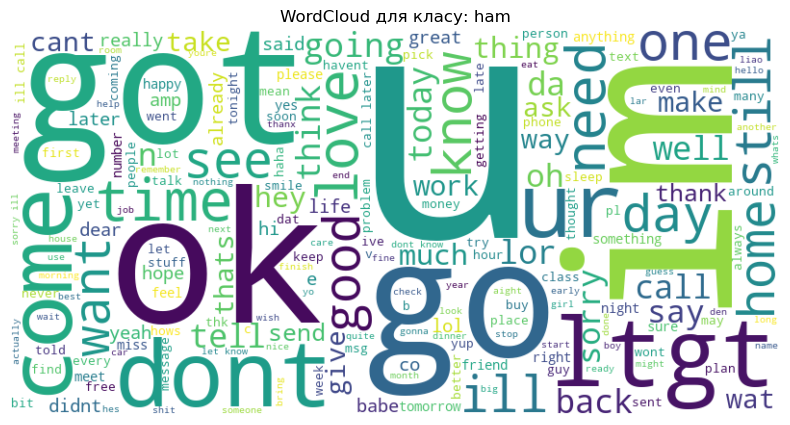

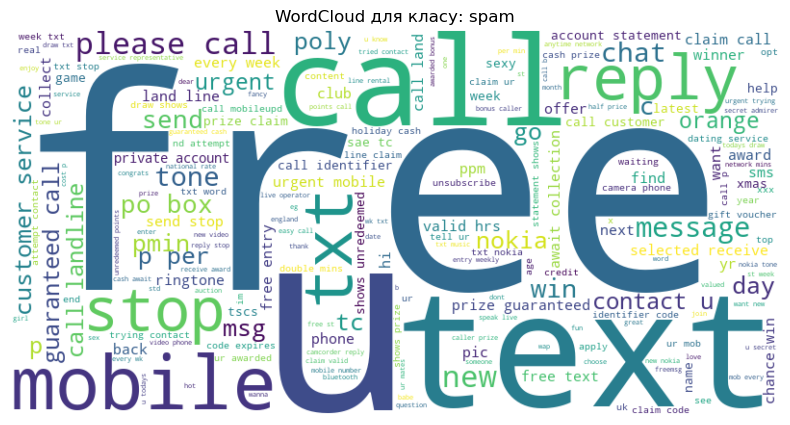

In [40]:
for label in df['label'].unique():
    text = ' '.join(df[df['label']==label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud для класу: {label}")
    plt.show()


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['label_num']


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [6]:
df = pd.read_csv("gdp.csv")

years = ['2020','2021','2022','2023','2024','2025']
X = df[years].fillna(0)

gdp_2023 = df['2023'].fillna(0)
df['Class'] = pd.qcut(gdp_2023, q=3, labels=["Low", "Medium", "High"])

y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== Початкові дані ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)

print("\n=== Після PCA (2 компоненти) ===")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca))


=== Початкові дані ===
Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        23
         Low       1.00      1.00      1.00        17
      Medium       1.00      1.00      1.00        19

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59


=== Після PCA (2 компоненти) ===
Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        23
         Low       1.00      1.00      1.00        17
      Medium       1.00      1.00      1.00        19

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

